# Customer Churn Analysis 

Importing the required libraries as shown below

Data Analysing

Data Visualization

Exploratory data analysis(EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
da=pd.read_csv('churn.csv')
da

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [3]:
da.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [4]:
da.tail()

state  account length  area code phone number international plan  \
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total intl charge  customer service calls  churn  
3328               2.67                       2  False  
3329               2.59                       3  False  
3330               3.81                       2  False  
3331               1.35                       2  False  
3332               3.70                       0  False  

[5 rows x 21 columns]

In [5]:
#dataset columns 

da.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
#finding null values column level

da.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
#data types of the columns

da.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

# Exploratory Data Analysis (EDA) Process

Univariate

415    1655
510     840
408     838
Name: area code, dtype: int64


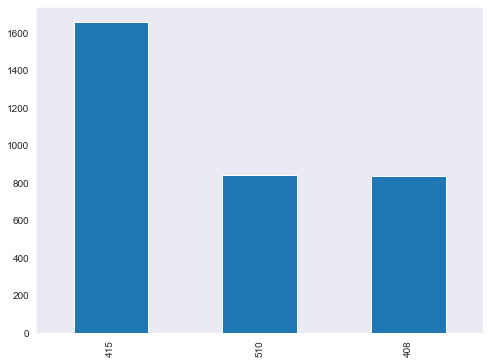

In [8]:
print(da['area code'].value_counts())
plt.figure(figsize=(8,6))
sb.set_style('dark')
da['area code'].value_counts().plot.bar()

no     3010
yes     323
Name: international plan, dtype: int64


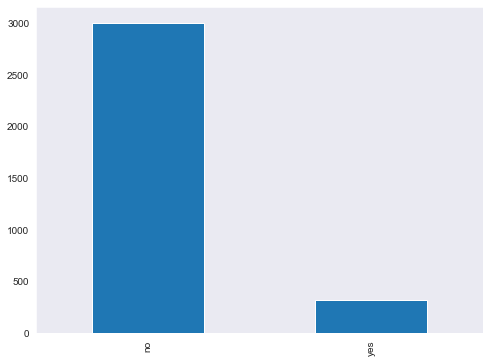

In [9]:
print(da['international plan'].value_counts())
plt.figure(figsize=(8,6))
da['international plan'].value_counts().plot.bar()

no     2411
yes     922
Name: voice mail plan, dtype: int64


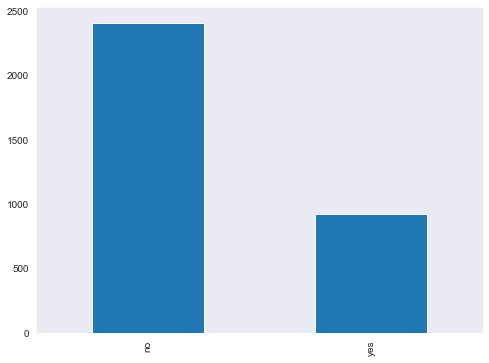

In [10]:
print(da['voice mail plan'].value_counts())
plt.figure(figsize=(8,6))
da['voice mail plan'].value_counts().plot.bar()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64


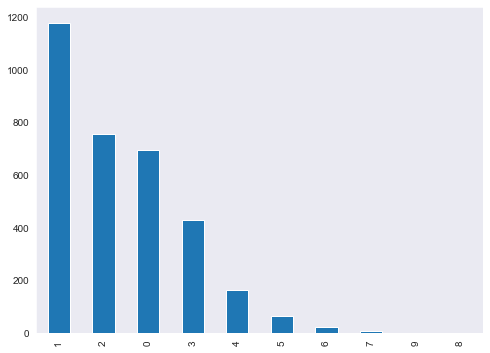

In [11]:
print(da['customer service calls'].value_counts())
plt.figure(figsize=(8,6))
da['customer service calls'].value_counts().plot.bar()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: number vmail messages, dtype: int64


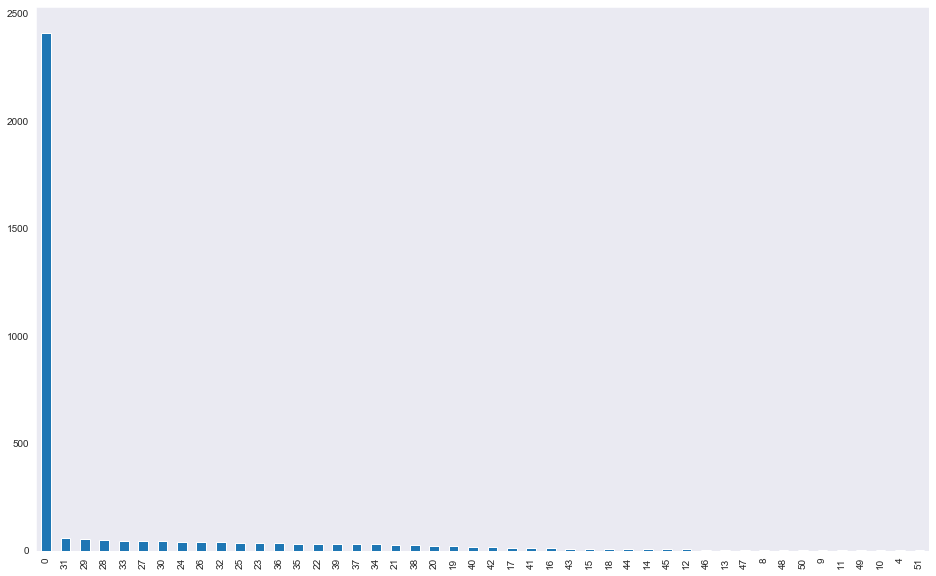

In [12]:
print(da['number vmail messages'].value_counts())
plt.figure(figsize=(16,10))
da['number vmail messages'].value_counts().plot.bar()

False    2850
True      483
Name: churn, dtype: int64


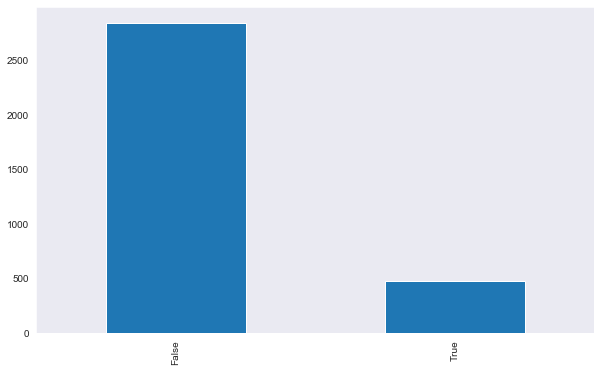

In [13]:
print(da['churn'].value_counts())
plt.figure(figsize=(10,6))
da['churn'].value_counts().plot.bar()

# Bivariate

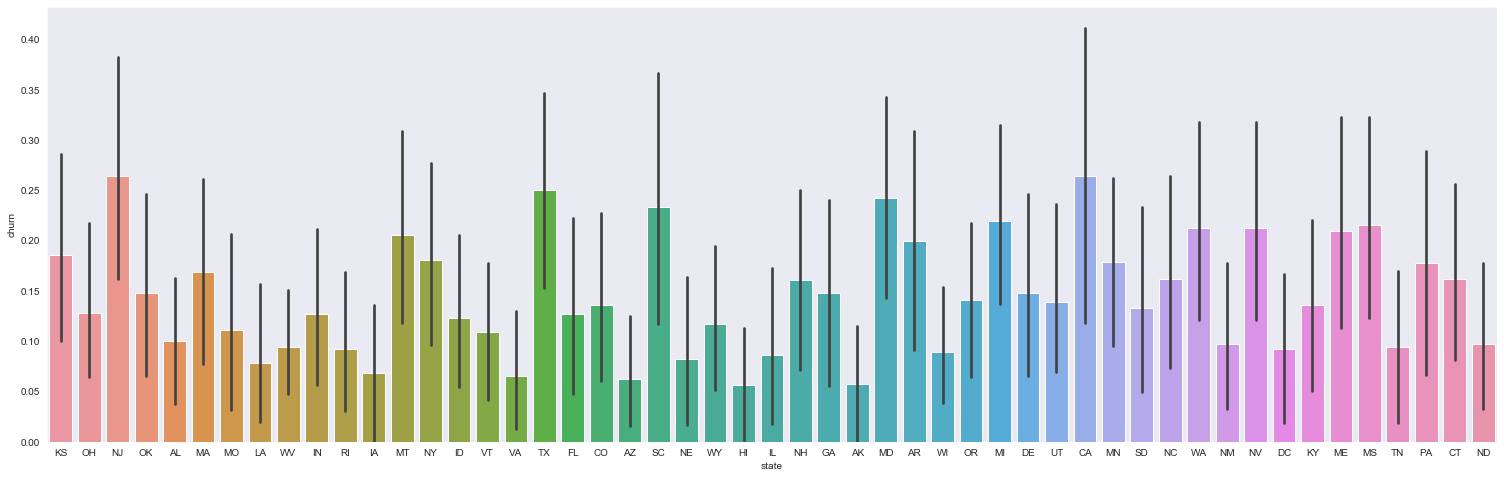

In [14]:
plt.figure(figsize=(26,8))
sb.barplot(x='state',y='churn',data=da)

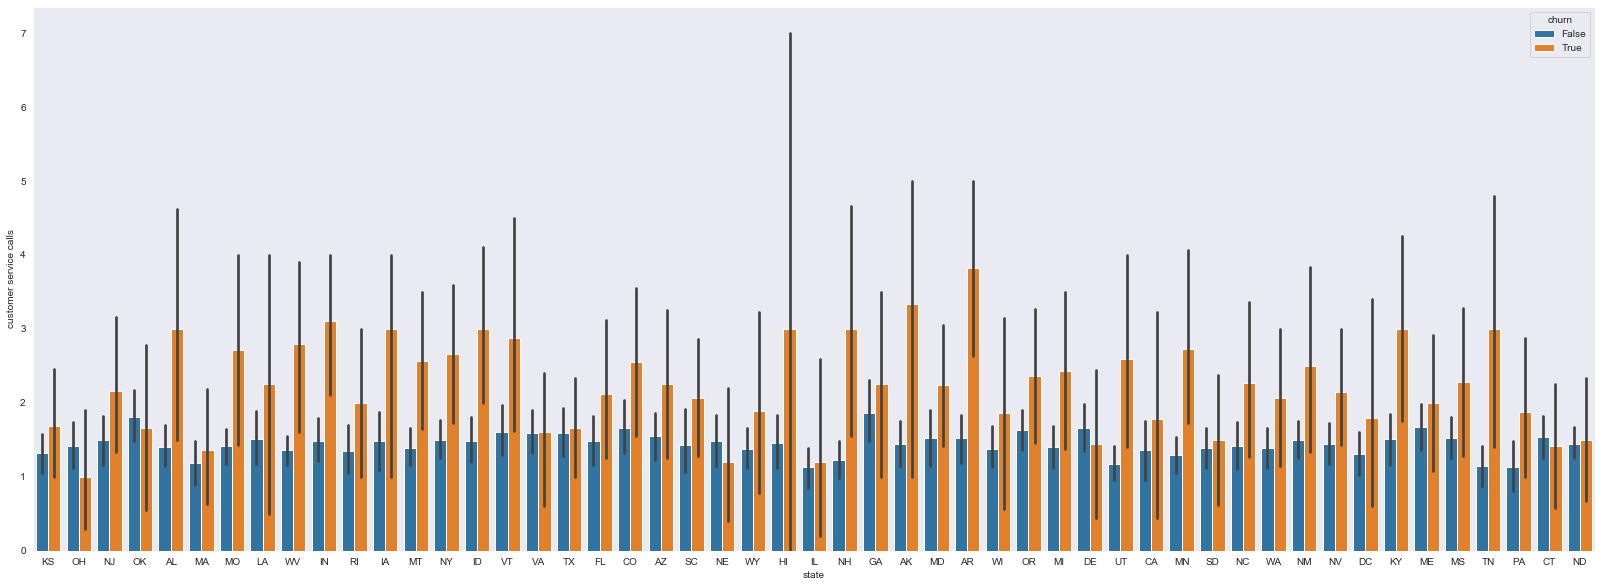

In [15]:
plt.figure(figsize=(28,10))
sb.barplot(x='state',y='customer service calls',hue='churn',data=da)

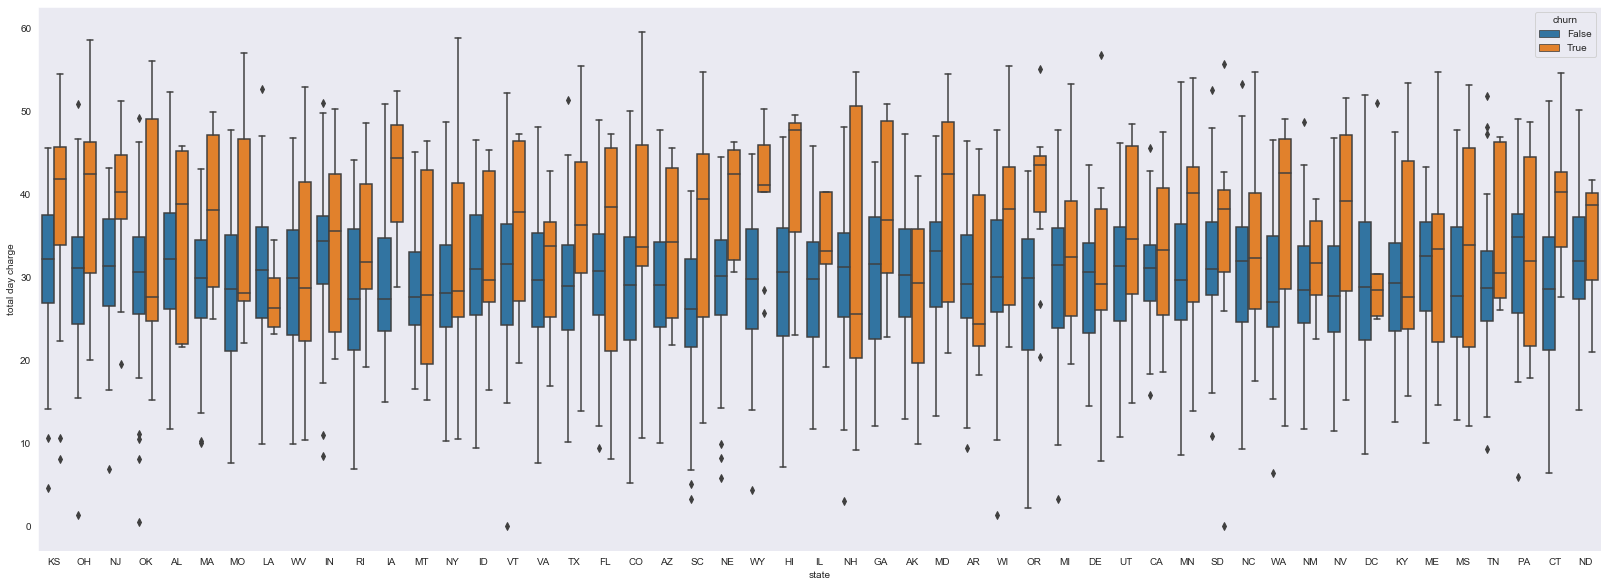

In [16]:
plt.figure(figsize=(28,10))
sb.boxplot(x='state',y='total day charge',hue='churn',data=da)

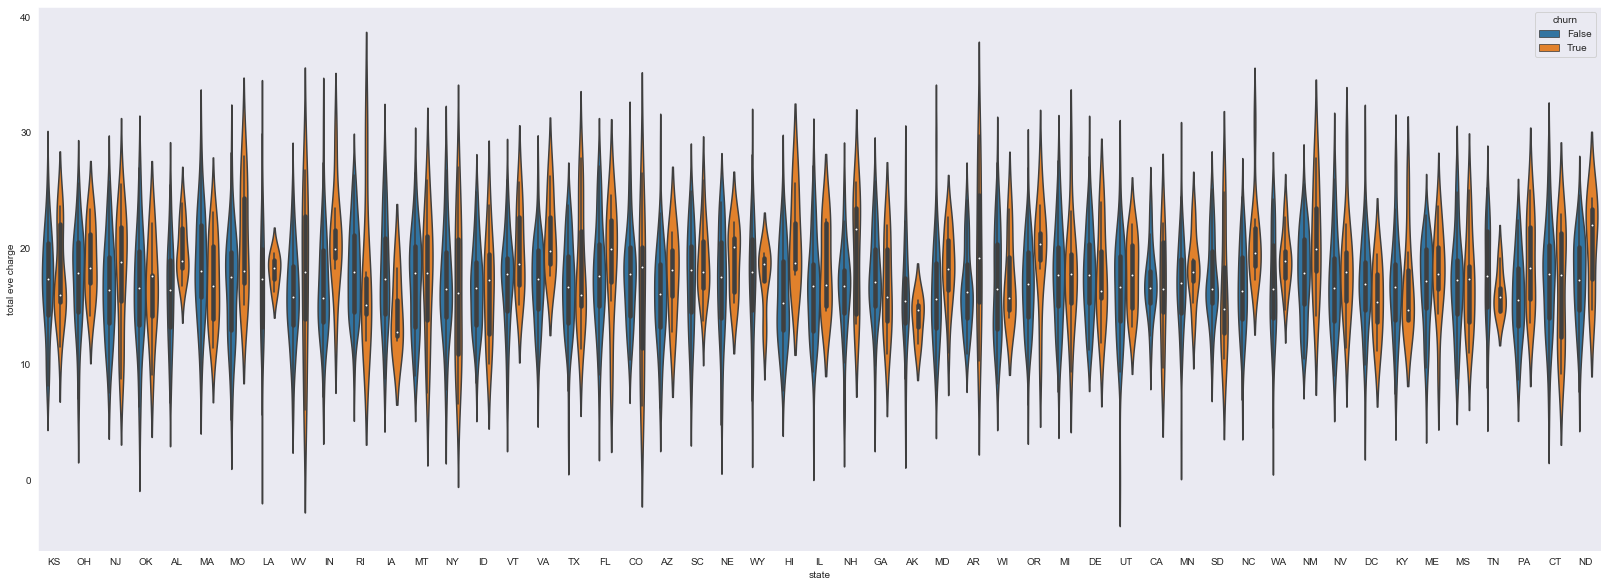

In [17]:
plt.figure(figsize=(28,10))
sb.violinplot(x='state',y='total eve charge',hue='churn',data=da)

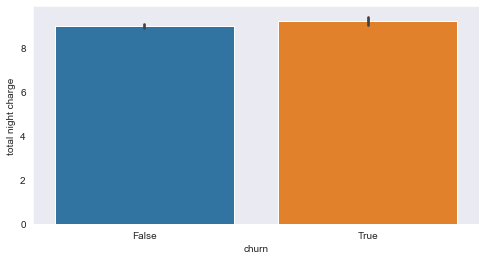

In [18]:
plt.figure(figsize=(8,4))
sb.barplot(x='churn',y='total night charge',data=da)

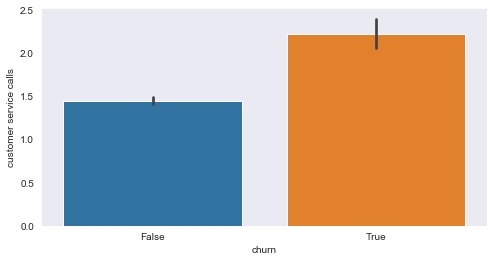

In [19]:
plt.figure(figsize=(8,4))
sb.barplot(x='churn',y='customer service calls',data=da)

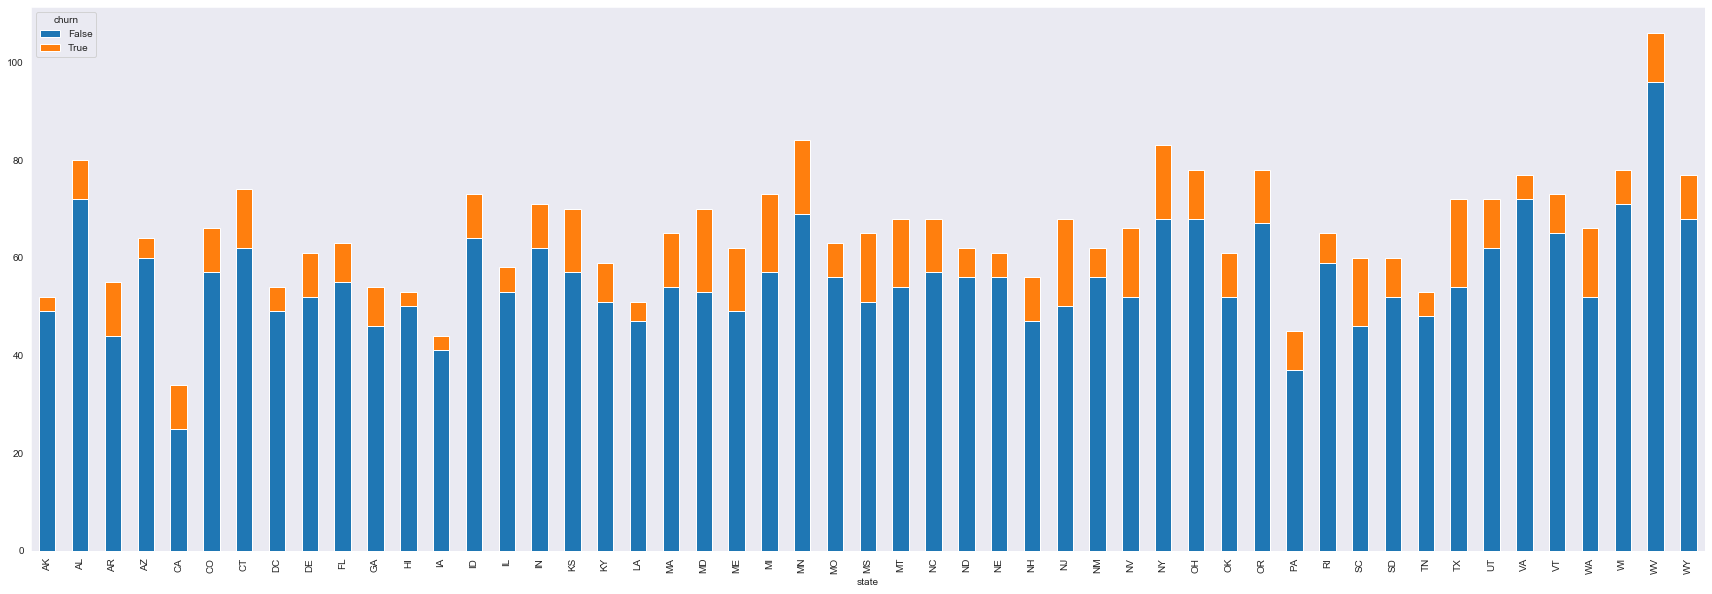

In [20]:
da.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True,figsize=(30,10))

In [21]:
#To get the descriptive analysis 

da.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

# Data preprocessing

In [22]:
col=['state','churn','phone number','international plan','voice mail plan']

In [23]:
#Preprocessing the data with label encoder

le=LabelEncoder()
da[col]=da[col].apply(lambda x:le.fit_transform(x))
da

state  account length  area code  phone number  international plan  \
0        16             128        415          1926                   0   
1        35             107        415          1575                   0   
2        31             137        415          1117                   0   
3        35              84        408          1707                   1   
4        36              75        415           110                   1   
...     ...             ...        ...           ...                 ...   
3328      3             192        415          3057                   0   
3329     49              68        415          1528                   0   
3330     39              28        510            42                   0   
3331      6             184        510          1331                   1   
3332     42              74        415          2559                   0   

      voice mail plan  number vmail messages  total day minutes  \
0                   1                     25              265.1   
1                   1                     26              161.6   
2                   0                      0              243.4   
3                   0                      0              299.4   
4                   0                      0              166.7   
...               ...                    ...                ...   
3328                1                     36              156.2   
3329                0                      0              231.1   
3330                0                      0              180.8   
3331                0                      0              213.8   
3332                1                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0          

In [24]:
da = da.drop(["phone number", "area code", "state"],axis=1)

In [25]:
da

account length  international plan  voice mail plan  \
0                128                   0                1   
1                107                   0                1   
2                137                   0                0   
3                 84                   1                0   
4                 75                   1                0   
...              ...                 ...              ...   
3328             192                   0                1   
3329              68                   0                0   
3330              28                   0                0   
3331             184                   1                0   
3332              74                   0                1   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6               2.67   
3329                 9.6                 4               2.59   
3330                14.1                 6               3.81   
3331                 5.0                

In [26]:
# the Correlation between the different variables

da.corr()

account length  international plan  voice mail plan  \
account length                1.000000            0.024735         0.002918   
international plan            0.024735            1.000000         0.006006   
voice mail plan               0.002918            0.006006         1.000000   
number vmail messages        -0.004628            0.008745         0.956927   
total day minutes             0.006216            0.049396        -0.001684   
total day calls               0.038470            0.003755        -0.011086   
total day charge              0.006214            0.049398        -0.001686   
total eve minutes            -0.006757            0.019100         0.021545   
total eve calls               0.019260            0.006114        -0.006444   
total eve charge             -0.006745            0.019106         0.021559   
total night minutes          -0.008955           -0.028905         0.006079   
total night calls            -0.013176            0.012451         0.015553   
total night charge           -0.008960           -0.028913         0.006064   
total intl minutes            0.009514            0.045871        -0.001318   
total intl calls              0.020661            0.017366         0.007618   
total intl charge             0.009546            0.045780        -0.001276   
customer service calls       -0.003796           -0.024522        -0.017824   
churn                         0.016541            0.259852        -0.102148   

                        number vmail messages  total day minutes  \
account length                      -0.004628           0.006216   
international plan                   0.008745           0.049396   
voice mail plan                      0.956927          -0.001684   
number vmail messages                1.000000           0.000778   
total day minutes                    0.000778           1.000000   
total day calls                     -0.009548           0.006750   
total day charge                     0.000776           1.000000   
total eve minutes                    0.017562           0.007043   
total eve calls                     -0.005864           0.015769   
total eve charge                     0.017578           0.007029   
total night minutes                  0.007681           0.004323   
total night calls                    0.007123           0.022972   
total night charge                   0.007663           0.004300   
total intl minutes                   0.002856          -0.010155   
total intl calls                     0.013957           0.008033   
total intl charge                    0.002884          -0.010092   
customer service calls              -0.013263          -0.013423   
churn                               -0.089728           0.205151   

                        total day calls  total day charge  total eve minutes  \
account length                 0.038470          0.006214          -0.006757   
international plan             0.003755          0.049398           0.019100   
voice mail plan               -0.011086         -0.001686           0.021545   
number vmail messages         -0.009548          0.000776           0.017562   
total day minutes              0.006750          1.000000           0.007043   
total day calls                1.000000          0.006753          -0.021451   
total day charge               0.006753          1.000000           0.007050   
total eve minutes             -0.021451          0.007050           1.000000   
total eve calls                0.006462          0.015769          -0.011430   
total eve charge              -0.021449          0.007036           1.000000   
total night minutes            0.022938          0.004324          -0.012584   
total night calls             -0.019557          0.022972           0.007586   
total night charge             0.022927          0.004301          -0.012593   
total intl minutes             0.021565         -0.010157          -0.011035   
total intl calls             

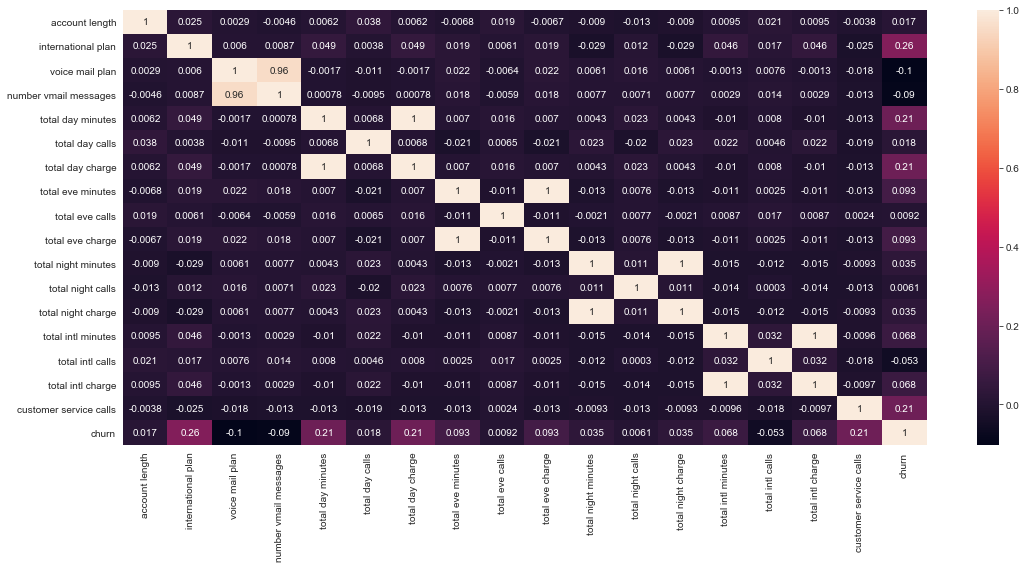

In [27]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(18,8))
sb.heatmap(da.corr(),annot=True)

<Figure size 1440x1152 with 0 Axes>

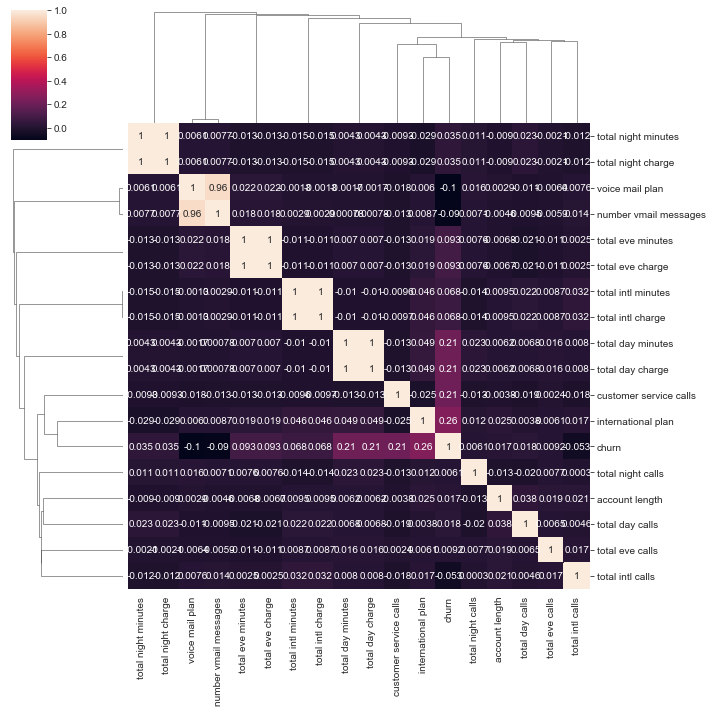

In [28]:
# This clustermap shows the Correlation between the different variables

plt.figure(figsize=(20,16))
sb.clustermap(da.corr(),annot=True)

pairwise plot of relationship with the dataset

Multivariate plotting of dataset

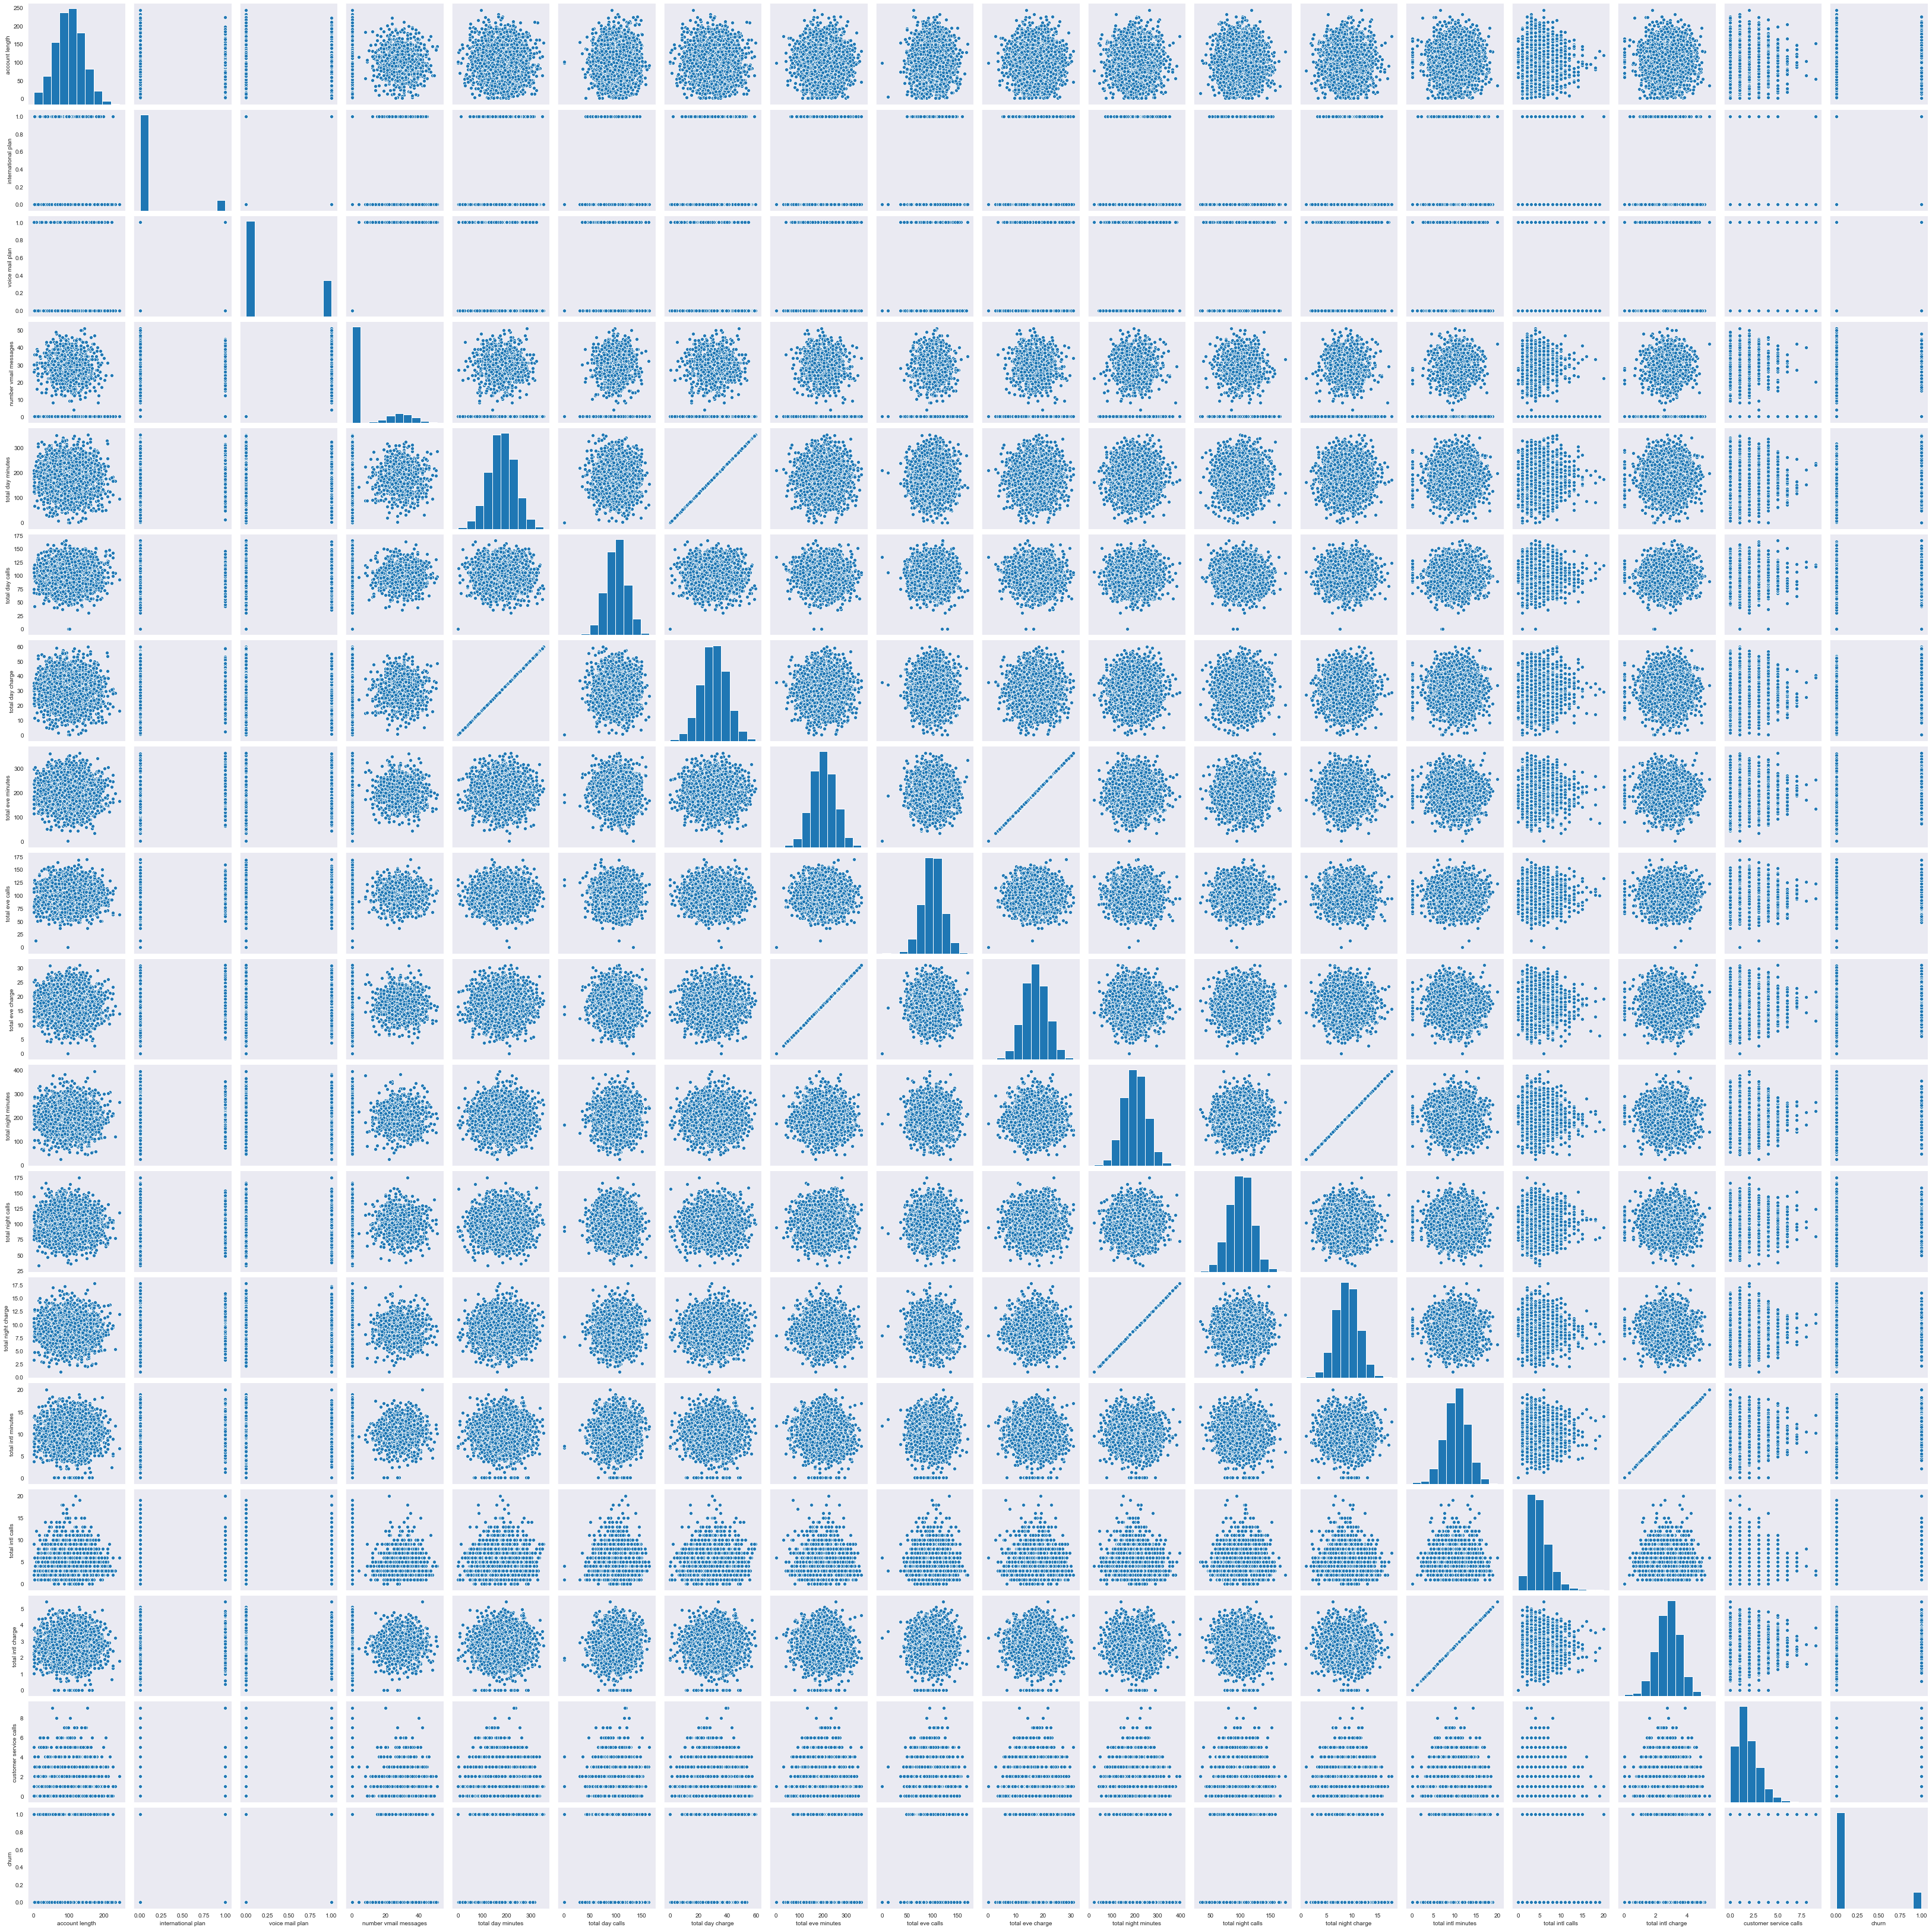

In [29]:
sb.pairplot(da)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [30]:
x=da.drop(['churn'],axis=1)
y=da['churn']

In [31]:
#data preprocessing with standard scaler

sc=StandardScaler()
x=sc.fit_transform(x)

In [32]:
#x data

x

array([[ 0.67648946, -0.32758048,  1.6170861 , ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.14906505, -0.32758048,  1.6170861 , ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.9025285 , -0.32758048, -0.61839626, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [-1.83505538, -0.32758048, -0.61839626, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [ 2.08295458,  3.05268496, -0.61839626, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [-0.67974475, -0.32758048,  1.6170861 , ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

In [33]:
#Y data

y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=300)

In [35]:
#working on LogisticRegression 
#training and testing data using LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [36]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
85.39999999999999
----------------------------------------
Confusion Matrix:
[[823  22]
 [124  31]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       845
           1       0.58      0.20      0.30       155

    accuracy                           0.85      1000
   macro avg       0.73      0.59      0.61      1000
weighted avg       0.83      0.85      0.82      1000



In [37]:
#cross valiadtion
score=cross_val_score(lr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(lr,x,y,cv=5)
print(predscore)

mean score : 0.8613886750318533
STD score: 0.00567645319996591

[0 0 0 ... 0 0 0]


In [38]:
#working on RandomForestClassifier 
#training and testing data using RandomForestClassifier

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [39]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
95.19999999999999
----------------------------------------
Confusion Matrix:
[[839   6]
 [ 42 113]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       845
           1       0.95      0.73      0.82       155

    accuracy                           0.95      1000
   macro avg       0.95      0.86      0.90      1000
weighted avg       0.95      0.95      0.95      1000



In [40]:
#cross valiadtion
score=cross_val_score(rfr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print(predscore)

mean score : 0.955896826361594
STD score: 0.0059590526313525885

[0 0 0 ... 0 0 0]


In [41]:
#working on KNeighborsClassifier 
#training and testing data using KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)

In [42]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
89.0
----------------------------------------
Confusion Matrix:
[[835  10]
 [100  55]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       845
           1       0.85      0.35      0.50       155

    accuracy                           0.89      1000
   macro avg       0.87      0.67      0.72      1000
weighted avg       0.89      0.89      0.87      1000



In [43]:
#cross valiadtion
score=cross_val_score(kn,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(kn,x,y,cv=5)
print(predscore)

mean score : 0.8955909432671051
STD score: 0.006310512005278856

[0 0 0 ... 0 0 0]


In [44]:
#working on DecisionTreeClassifier 
#training and testing data using DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)

In [45]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
91.5
----------------------------------------
Confusion Matrix:
[[804  41]
 [ 44 111]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       845
           1       0.73      0.72      0.72       155

    accuracy                           0.92      1000
   macro avg       0.84      0.83      0.84      1000
weighted avg       0.91      0.92      0.91      1000



cross valiadtion and prediction

In [46]:
#cross valiadtion
score=cross_val_score(dtc,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(dtc,x,y,cv=5)
print(predscore)

mean score : 0.9138908023465744
STD score: 0.0076275785804449745

[0 0 0 ... 0 0 0]


# Grid Search


GridSearchCV for the best model

In [47]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

# Saving the model with joblib

In [48]:
joblib.dump(rfr,'churn.pkl')

['churn.pkl']

# Conclusion


Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Exploratory data analysis and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib